# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Adir Shachri 5599
# student 2: Almog Bacharlia 4955

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,accuracy_score, classification_report,make_scorer,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# Load the Datasets
df_test = pd.read_csv('./wine_test.csv')
df_train = pd.read_csv('./wine_train.csv')

In [4]:
df_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [5]:
df_train.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [6]:
# Check for duplicated rows
print("Number of duplicated rows in training data: ", df_train.duplicated().sum())
print("Number of duplicated rows in test data: ", df_test.duplicated().sum())

# Drop duplicates if necessary
train_data = df_train.drop_duplicates()
test_data = df_test.drop_duplicates()

# Check for missing data
print("Missing values in training data:\n", df_train.isnull().sum())
print("\nMissing values in test data:\n", df_test.isnull().sum())

Number of duplicated rows in training data:  0
Number of duplicated rows in test data:  0
Missing values in training data:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Missing values in test data:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue             

In [7]:
# Data statistics
df_train.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


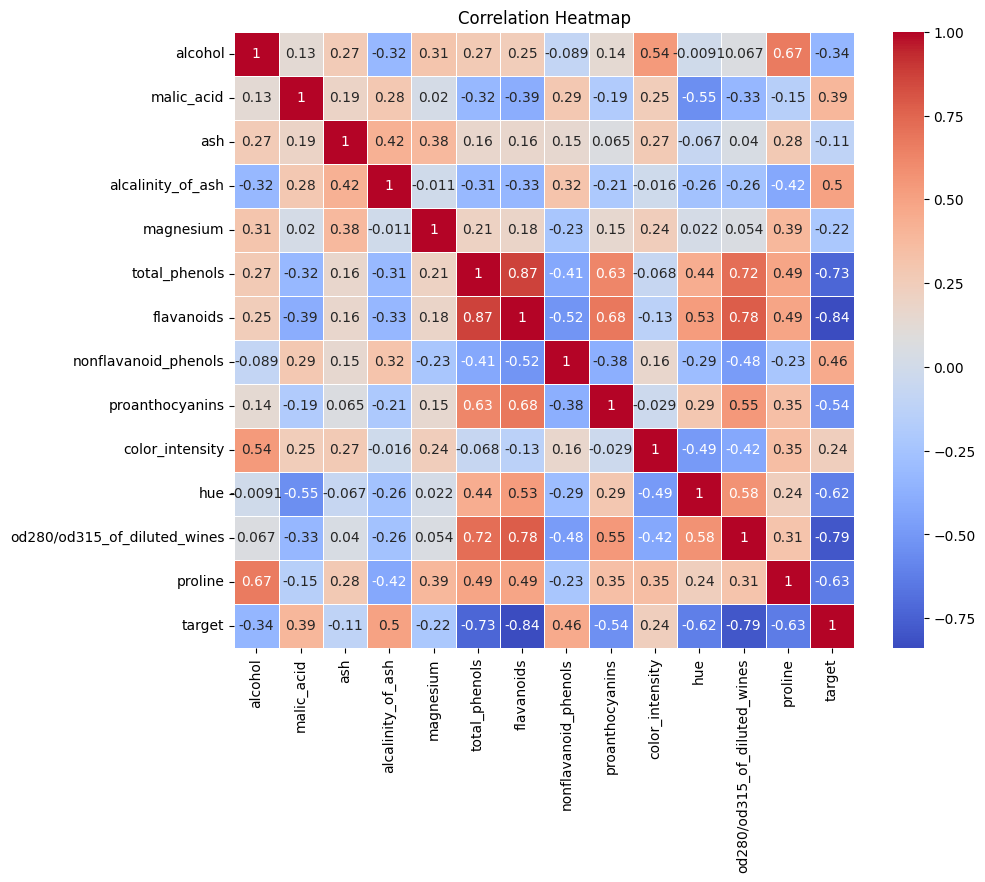

In [8]:
# 2 tables data presentation:
# pearson coefficient:
correlation_matrix = df_train.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

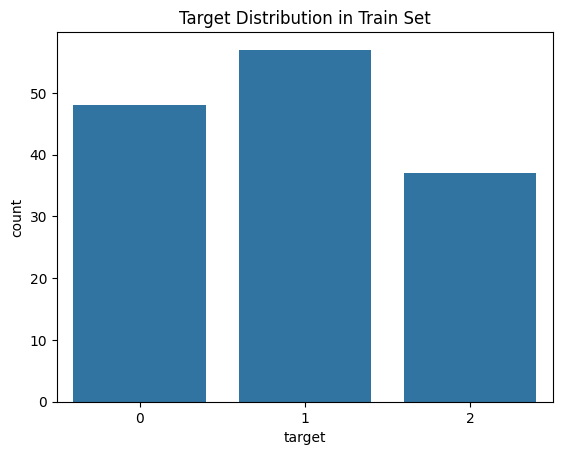

In [9]:
# Visualize the distribution of target 
plt.figure()
sns.countplot(x='target', data=df_train)
plt.title('Target Distribution in Train Set')
plt.show()

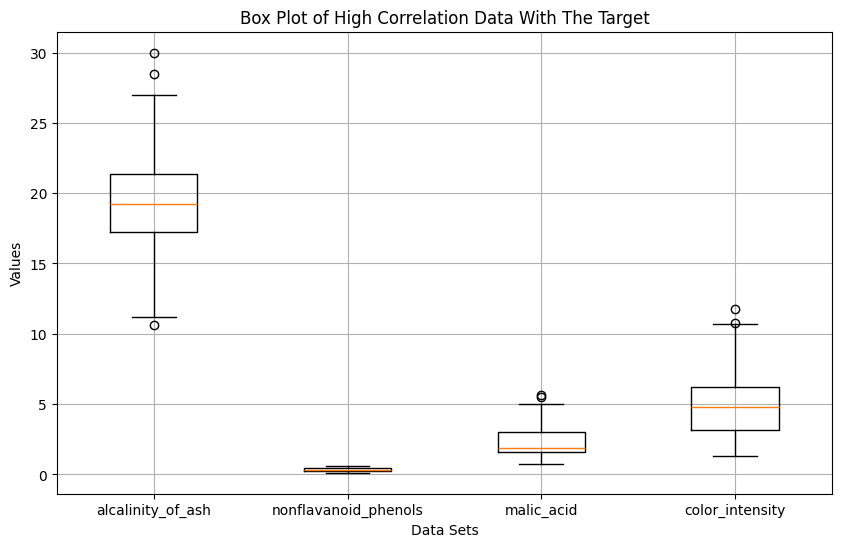

In [10]:
# 2 visualizations:
# boxplot
target_features = ['alcalinity_of_ash', 'nonflavanoid_phenols', 'malic_acid','color_intensity']
plt.figure(figsize=(10, 6))
plt.boxplot([df_train[feature] for feature in target_features])
plt.title('Box Plot of High Correlation Data With The Target')
plt.xlabel('Data Sets')
plt.ylabel('Values')
plt.xticks([1,2,3,4],target_features)
plt.grid(True)
plt.show()

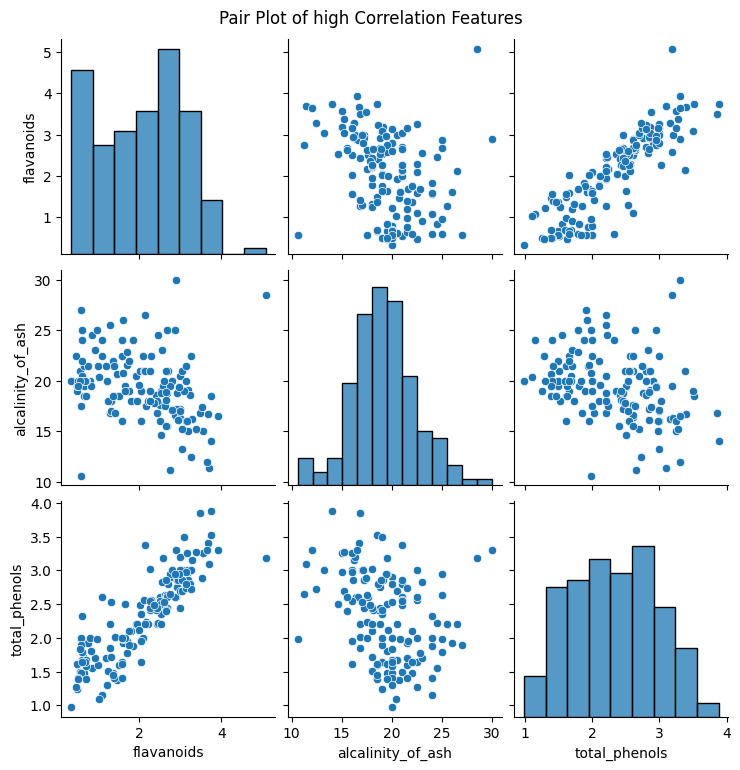

In [11]:
# pair plot
target_features = ['flavanoids', 'alcalinity_of_ash', 'total_phenols',]
sns.pairplot(df_train[target_features])
plt.suptitle('Pair Plot of high Correlation Features', y=1.02)
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [12]:
# running PCA, standart scaling, keeping the highest correlated feature with target, reduce dimenstions.
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]
def knn_pca_reduce_dimensions(n_neighbors, distance):
    target_train = df_train['target']
    features_train = df_train.drop(columns=['target'])

    # Scale the data
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)
    
    # Apply PCA
    pca = PCA(n_components=7)
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for KNN
    X_train = final_train_df[['PC1']]
    y_train = final_train_df['target']


    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

   
    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=f1_scorer).round(4)
    
    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {cv_scores.mean().round(4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {cv_scores.std().round(4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')
    return cv_scores.mean()

In [13]:
cv_score_mean_dict = {"k=5, dist=manhattan": knn_pca_reduce_dimensions(5, 1),
                      "k=5, dist=euclid":knn_pca_reduce_dimensions(5, 2),
                      "k=3, dist=manhattan":knn_pca_reduce_dimensions(3, 1),
                      "k=3, dist=euclid":knn_pca_reduce_dimensions(3, 2), 
                      "k=1, dist=manhattan": knn_pca_reduce_dimensions(1, 1),
                      "k=1, dist=euclid": knn_pca_reduce_dimensions(1, 2)}
print(pd.Series(cv_score_mean_dict))
df_res = pd.Series(cv_score_mean_dict)
max_key_reduceKNN = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_reduceKNN = cv_score_mean_dict[max_key_reduceKNN]
print("\n\nFeature engeneering: PCA, removing dimentions, Standard Scaling \nAlgorithm: KNN \n\n")

print("** best result:",max_key_reduceKNN, "**", "F1-macro:", max_value_reduceKNN.round(4))

Cross-Validation F1-macro Scores: [0.8999 0.7029 0.8645 0.9333 0.8964]
Mean Cross-Validation F1-macro: 0.8594
Standard Deviation of Cross-Validation F1-macro: 0.0812


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8999 0.7029 0.8645 0.9333 0.8964]
Mean Cross-Validation F1-macro: 0.8594
Standard Deviation of Cross-Validation F1-macro: 0.0812


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8067 0.7096 0.8263 0.9333 0.7632]
Mean Cross-Validation F1-macro: 0.8078
Standard Deviation of Cross-Validation F1-macro: 0.0745


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8067 0.7096 0.8263 0.9333 0.7632]
Mean Cross-Validation F1-macro: 0.8078
Standard Deviation of Cross-Validation F1-macro: 0.0745


-------------------------------------------------------------------------------

In [14]:
# running PCA, standart scaling, keeping of the PCA dimensions.
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]

def knn_pca_keep_dimensions(n_neighbors, distance):
    target_train = df_train['target']
    features_train = df_train.drop(columns=['target'])

    # Scale the data
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for KNN
    X_train = final_train_df.drop(columns=['target'])
    y_train = final_train_df['target']

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=f1_scorer).round(4)

    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {cv_scores.mean().round(4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {cv_scores.std().round(4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')
    return cv_scores.mean()

In [15]:
cv_score_mean_dict = {"k=5, dist=manhattan": knn_pca_keep_dimensions(5, 1),
                      "k=5, dist=euclid":knn_pca_keep_dimensions(5, 2),
                      "k=3, dist=manhattan":knn_pca_keep_dimensions(3, 1),
                      "k=3, dist=euclid":knn_pca_keep_dimensions(3, 2), 
                      "k=1, dist=manhattan": knn_pca_keep_dimensions(1, 1),
                      "k=1, dist=euclid": knn_pca_keep_dimensions(1, 2)}
print(pd.Series(cv_score_mean_dict))
df_res = pd.Series(cv_score_mean_dict)
max_key_keepKNN = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_keepKNN = cv_score_mean_dict[max_key_keepKNN]
print("\n\nFeature engeneering: PCA, keeping all dimentions, Standard Scaling \nAlgorithm: KNN \n\n")
print("** best result:",max_key_keepKNN, "**", "F1-macro:", max_value_keepKNN.round(4))

Cross-Validation F1-macro Scores: [1.     0.9316 1.     0.9299 1.    ]
Mean Cross-Validation F1-macro: 0.9723
Standard Deviation of Cross-Validation F1-macro: 0.0339


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [1.     0.9316 1.     0.9299 1.    ]
Mean Cross-Validation F1-macro: 0.9723
Standard Deviation of Cross-Validation F1-macro: 0.0339


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [1.     0.9316 1.     0.9333 0.9282]
Mean Cross-Validation F1-macro: 0.9586
Standard Deviation of Cross-Validation F1-macro: 0.0338


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.9633 0.9316 1.     0.9299 0.9683]
Mean Cross-Validation F1-macro: 0.9586
Standard Deviation of Cross-Validation F1-macro: 0.026


--------------------------------------------------------------------------------

In [16]:
# MinMax scaling, removing features that highly correlated with other features (more than 75% correlation).
# Algorithm: KNN, testing hyperparameters: n_neighbors: [1,3,5], distance: [1:manhattan, 2:euclid]

def knn_minmax_reduce_correlation(n_neighbors, distance, df_train, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply MinMax Scaling
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Convert to DataFrame to handle correlation
    scaled_train_df = pd.DataFrame(scaled_train_data, columns=features_train.columns)

    # Reduce highly correlated features
    corr_matrix = scaled_train_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
    reduced_train_df = scaled_train_df.drop(columns=to_drop)

    print(f'Dropped columns due to high correlation: {to_drop}')

    # Prepare data for KNN
    X_train = reduced_train_df
    y_train = target_train

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)

    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring=f1_scorer).round(4)
    

    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {np.round(cv_scores.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {np.round(cv_scores.std(), 4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')

    return cv_scores.mean()


In [17]:
# Example usage
cv_score_mean_dict = {
    "k=5, dist=manhattan": knn_minmax_reduce_correlation(5, 1, df_train),
    "k=5, dist=euclid": knn_minmax_reduce_correlation(5, 2, df_train),
    "k=3, dist=manhattan": knn_minmax_reduce_correlation(3, 1, df_train),
    "k=3, dist=euclid": knn_minmax_reduce_correlation(3, 2, df_train),
    "k=1, dist=manhattan": knn_minmax_reduce_correlation(1, 1, df_train),
    "k=1, dist=euclid": knn_minmax_reduce_correlation(1, 2, df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key_minmaxKNN = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_minmaxKNN = cv_score_mean_dict[max_key_minmaxKNN]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: MinMax Scaling, reducing highly correlated features \nAlgorithm: KNN \n\n")
print("** Best result:", max_key_minmaxKNN, "**", "F1-macro:", max_value_minmaxKNN.round(4))

Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [1.     0.8614 0.9666 0.9299 0.9683]
Mean Cross-Validation F1-macro: 0.9452
Standard Deviation of Cross-Validation F1-macro: 0.0474


--------------------------------------------------------------------------------


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [1.     0.8948 1.     0.9299 0.9599]
Mean Cross-Validation F1-macro: 0.9569
Standard Deviation of Cross-Validation F1-macro: 0.0408


--------------------------------------------------------------------------------


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [1.     0.8586 0.9666 0.9666 0.9683]
Mean Cross-Validation F1-macro: 0.952
Standard Deviation of Cross-Validation F1-macro: 0.0484


-------------------------------------------------------------------

In [18]:
# running PCA, standard scaling, keeping "PC1" the highest correlated feature with target.
# Algorithm: decision tree, testing hyperparameters: depths: [5,10,15,20,None], criteria: ['gini', 'entropy']
# We want to indentify the best HyperParameters
def decision_tree_pca_reduce_dimensions(depth, criterion, df_train, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply Standard Scaling
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)  # Keep only the first principal component
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for Decision Tree
    X_train = final_train_df[['PC1']]
    y_train = final_train_df['target']

    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=depth, criterion=criterion)  # Use max_depth and criterion as parameters

    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring=f1_scorer).round(4)
    

    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {np.round(cv_scores.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {np.round(cv_scores.std(), 4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')

    return cv_scores.mean()

In [19]:
# Example usage
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_pca_reduce_dimensions(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_pca_reduce_dimensions(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_pca_reduce_dimensions(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_pca_reduce_dimensions(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_pca_reduce_dimensions(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_pca_reduce_dimensions(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_pca_reduce_dimensions(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_pca_reduce_dimensions(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_pca_reduce_dimensions(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_pca_reduce_dimensions(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key_tree_reduce = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_tree_reduce = cv_score_mean_dict[max_key_tree_reduce]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: Standard Scaling, PCA (keeping only PC1) \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key_tree_reduce, "**", "F1-macro:", max_value_tree_reduce.round(4))

Cross-Validation F1-macro Scores: [0.8386 0.7096 0.823  0.8997 0.8033]
Mean Cross-Validation F1-macro: 0.8148
Standard Deviation of Cross-Validation F1-macro: 0.0617


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8028 0.7096 0.7917 0.8611 0.8033]
Mean Cross-Validation F1-macro: 0.7937
Standard Deviation of Cross-Validation F1-macro: 0.0486


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8028 0.7096 0.7917 0.8611 0.8033]
Mean Cross-Validation F1-macro: 0.7937
Standard Deviation of Cross-Validation F1-macro: 0.0486


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [0.8028 0.7096 0.7917 0.8611 0.8033]
Mean Cross-Validation F1-macro: 0.7937
Standard Deviation of Cross-Validation F1-macro: 0.0486


-------------------------------------------------------------------------------

In [20]:
# This function trains and evaluates a Decision Tree classifier with Standard Scaling 
# and dimensionality reduction using PCA while keeping all of the PCA result dimensions 
# The goal is to identify the best max_depth:[5,10,15,20,None] and criterion:['gini', 'entropy'] hyperparameters 
# for the Decision Tree model using 5-fold cross-validation.

def decision_tree_pca_keep_dimensions(depth, criterion, df_train, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply Standard Scaling
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=7)  # Keep all principal components
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Create DataFrames with the principal components
    pca_df_train = pd.DataFrame(data=principal_components_train, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])

    # Add the target column back
    final_train_df = pd.concat([pca_df_train, target_train.reset_index(drop=True)], axis=1)

    # Prepare data for Decision Tree
    X_train = final_train_df.drop(columns=['target'])
    y_train = final_train_df['target']

    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=depth, criterion=criterion)  # Use max_depth and criterion as parameters

    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring=f1_scorer).round(4)
    

    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {np.round(cv_scores.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {np.round(cv_scores.std(), 4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')

    return cv_scores.mean()

In [21]:
# Example usage
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_pca_keep_dimensions(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_pca_keep_dimensions(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_pca_keep_dimensions(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_pca_keep_dimensions(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_pca_keep_dimensions(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_pca_keep_dimensions(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_pca_keep_dimensions(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_pca_keep_dimensions(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_pca_keep_dimensions(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_pca_keep_dimensions(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key_tree_keep = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_tree_keep = cv_score_mean_dict[max_key_tree_keep]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: Standard Scaling, PCA (keeping all dimensions) \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key_tree_keep, "**", "F1-macro:", max_value_tree_keep.round(4))

Cross-Validation F1-macro Scores: [0.9696 0.8332 1.     0.8973 0.9683]
Mean Cross-Validation F1-macro: 0.9337
Standard Deviation of Cross-Validation F1-macro: 0.0605


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [1.     0.8332 1.     0.9327 0.9683]
Mean Cross-Validation F1-macro: 0.9468
Standard Deviation of Cross-Validation F1-macro: 0.062


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [1.     0.8009 1.     0.8973 0.9364]
Mean Cross-Validation F1-macro: 0.9269
Standard Deviation of Cross-Validation F1-macro: 0.0742


--------------------------------------------------------------------------------


Cross-Validation F1-macro Scores: [1.     0.8332 1.     0.8973 1.    ]
Mean Cross-Validation F1-macro: 0.9461
Standard Deviation of Cross-Validation F1-macro: 0.0691


--------------------------------------------------------------------------------

In [22]:
# Function to train and evaluate Decision Tree with MinMax scaling and correlation-based feature reduction
def decision_tree_minmax_reduce_correlation(max_depth, criterion, df_train, target_column='target' ):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Apply MinMax Scaling
    scaler = MinMaxScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Convert to DataFrame to handle correlation
    scaled_train_df = pd.DataFrame(scaled_train_data, columns=features_train.columns)

    # Reduce highly correlated features
    corr_matrix = scaled_train_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]
    reduced_train_df = scaled_train_df.drop(columns=to_drop)

    print(f'Dropped columns due to high correlation: {to_drop}')

    # Prepare data for Decision Tree
    X_train = reduced_train_df
    y_train = target_train
    
    # Train the Decision Tree model
    dt = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)

    # Create F1-macro scorer
    f1_scorer = make_scorer(f1_score, average='macro')

    # Perform 5-fold cross-validation on the training data using F1-macro
    cv_scores = cross_val_score(dt, X_train, y_train, cv=5, scoring=f1_scorer).round(4)
    

    print(f'Cross-Validation F1-macro Scores: {cv_scores}')
    print(f'Mean Cross-Validation F1-macro: {np.round(cv_scores.mean(), 4)}')
    print(f'Standard Deviation of Cross-Validation F1-macro: {np.round(cv_scores.std(), 4)}')
    print('\n\n--------------------------------------------------------------------------------\n\n')

    return cv_scores.mean()

In [23]:
# Example usage with both depth and criterion
cv_score_mean_dict = {
    "depth=5, criterion=gini": decision_tree_minmax_reduce_correlation(5, 'gini', df_train),
    "depth=10, criterion=gini": decision_tree_minmax_reduce_correlation(10, 'gini', df_train),
    "depth=15, criterion=gini": decision_tree_minmax_reduce_correlation(15, 'gini', df_train),
    "depth=20, criterion=gini": decision_tree_minmax_reduce_correlation(20, 'gini', df_train),
    "depth=None, criterion=gini": decision_tree_minmax_reduce_correlation(None, 'gini', df_train),
    "depth=5, criterion=entropy": decision_tree_minmax_reduce_correlation(5, 'entropy', df_train),
    "depth=10, criterion=entropy": decision_tree_minmax_reduce_correlation(10, 'entropy', df_train),
    "depth=15, criterion=entropy": decision_tree_minmax_reduce_correlation(15, 'entropy', df_train),
    "depth=20, criterion=entropy": decision_tree_minmax_reduce_correlation(20, 'entropy', df_train),
    "depth=None, criterion=entropy": decision_tree_minmax_reduce_correlation(None, 'entropy', df_train)
}

df_res = pd.Series(cv_score_mean_dict)
max_key_tree_minmax = max(cv_score_mean_dict, key=cv_score_mean_dict.get)
max_value_tree_minmax = cv_score_mean_dict[max_key_tree_minmax]

print(pd.Series(cv_score_mean_dict))
print("\n\nFeature Engineering: MinMax Scaling, reducing highly correlated features \nAlgorithm: Decision Tree \n\n")
print("** Best result:", max_key_tree_minmax, "**", "F1-macro:", max_value_tree_minmax.round(4))

Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [0.8933 0.7208 0.8198 0.8524 0.9599]
Mean Cross-Validation F1-macro: 0.8492
Standard Deviation of Cross-Validation F1-macro: 0.0794


--------------------------------------------------------------------------------


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [0.8608 0.727  0.7804 0.8524 0.9599]
Mean Cross-Validation F1-macro: 0.8361
Standard Deviation of Cross-Validation F1-macro: 0.079


--------------------------------------------------------------------------------


Dropped columns due to high correlation: ['flavanoids', 'od280/od315_of_diluted_wines']
Cross-Validation F1-macro Scores: [0.8933 0.7251 0.7709 0.9295 0.9599]
Mean Cross-Validation F1-macro: 0.8557
Standard Deviation of Cross-Validation F1-macro: 0.0916


-------------------------------------------------------------------

In [29]:
data = {
    "Algorithm":["minmaxKNN","keepKNN","reduceKNN","minmaxtree","keeptree","reducetree"],
    "Hyperparmeters": [max_key_minmaxKNN, max_key_keepKNN, max_key_reduceKNN,max_key_tree_minmax, max_key_tree_keep, max_key_tree_reduce,],
    "F1-macro": [max_value_minmaxKNN, max_value_keepKNN, max_value_reduceKNN,max_value_tree_minmax, max_value_tree_keep, max_value_tree_reduce]
}

df_custom= pd.DataFrame(data)
df_custom

,Algorithm,Hyperparmeters,F1-macro
0,minmaxKNN,"k=5, dist=euclid",0.95692
1,keepKNN,"k=5, dist=manhattan",0.97230
2,reduceKNN,"k=5, dist=manhattan",0.85940
3,minmaxtree,"depth=10, criterion=entropy",0.88272
4,keeptree,"depth=10, criterion=gini",0.94684
5,reducetree,"depth=5, criterion=entropy",0.83240


In [30]:
print("The best Algorithm:")
print(df_custom.loc[df_custom['F1-macro'].idxmax()])

The best Algorithm:
Algorithm                     keepKNN
Hyperparmeters    k=5, dist=manhattan
F1-macro                       0.9723
Name: 1, dtype: object


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [26]:
def train_knn_pca(df_train, n_neighbors, distance, n_components=7, target_column='target'):
    target_train = df_train[target_column]
    features_train = df_train.drop(columns=[target_column])

    # Scale the data
    scaler = StandardScaler()
    scaled_train_data = scaler.fit_transform(features_train)

    # Apply PCA
    pca = PCA(n_components=n_components)
    principal_components_train = pca.fit_transform(scaled_train_data)

    # Prepare data for KNN
    X_train = pd.DataFrame(data=principal_components_train, columns=[f'PC{i+1}' for i in range(n_components)])
    y_train = target_train

    # Train the KNN model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors, p=distance)
    knn.fit(X_train, y_train)

    return knn, scaler, pca

## Part 5 - Apply on test and show model performance estimation

In [27]:
def test_knn_pca(df_test, knn, scaler, pca, target_column='target'):
    target_test = df_test[target_column]
    features_test = df_test.drop(columns=[target_column])

    # Scale the data
    scaled_test_data = scaler.transform(features_test)

    # Apply PCA
    principal_components_test = pca.transform(scaled_test_data)

    # Prepare data for KNN
    X_test = pd.DataFrame(data=principal_components_test, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    y_test = target_test

    # Predict the test data
    y_pred = knn.predict(X_test)

    # Create F1-macro scorer
    f1_macro = f1_score(y_test, y_pred, average='macro')
    
    # Evaluate the model
    report = classification_report(y_test, y_pred)

    print(f'F1-macro: {f1_macro:.3f}')
    print('Classification Report:')
    print(report)

    return y_pred, y_test

F1-macro: 0.973
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        11

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



<Figure size 800x600 with 0 Axes>

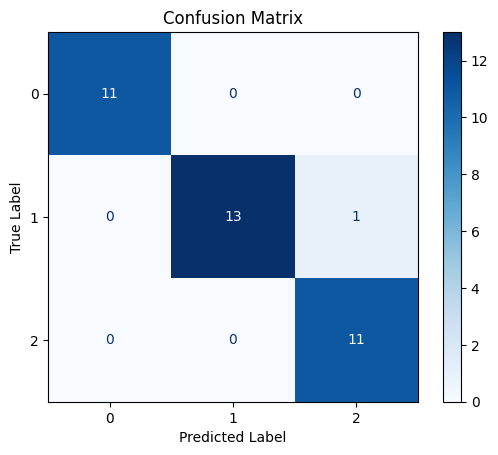


First 30 predictions vs actual results:
Prediction: 2, Actual: 2
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 1, Actual: 1
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 2, Actual: 1
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 0, Actual: 0
Prediction: 2, Actual: 2
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2
Prediction: 2, Actual: 2


In [28]:
# Train the KNN model
best_knn_model, scaler, pca = train_knn_pca(df_train, n_neighbors=5, distance=1)
 
# Test the KNN model
y_pred, y_test = test_knn_pca(df_test, best_knn_model, scaler, pca)
 
# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_knn_model.classes_)
disp.plot(cmap=plt.cm.Blues)
 
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
 
# Print first 30 predictions against actual results
print("\nFirst 30 predictions vs actual results:")
for i in range(30):
    print(f"Prediction: {y_pred[i]}, Actual: {y_test.values[i]}")